**Importing Libraries & Reading Data [Darshil Shah]**

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Exploring dataset**

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/spark foundation/SampleSuperstore.csv")
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.shape


(9994, 13)

In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Checking missing values and Outliers**

**Check for the null values**

In [ ]:
df.isna().apply(pd.value_counts)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
False,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994


In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Check if any duplicate rows in dataset**

In [ ]:
df.duplicated().sum()

17

**drop the duplicate values**

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

**Drop Unnecessary Columns as we have only 1 country so its not important to have country and postal code**

In [ ]:
df = df.drop(['Country','Postal Code'],axis=1)
df.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Differentiate categorical data and numerical data**

In [ ]:
num_df = df[['Sales','Quantity','Discount','Profit']]

cat_df = df[['Ship Mode','Segment','City','State','Region','Category','Sub-Category']]

**Unique features of columns**

In [ ]:
print(df.Segment.unique())
print(df.Category.unique())
print(df['Ship Mode'].unique())
print(df.State.unique())

['Consumer' 'Corporate' 'Home Office']
['Furniture' 'Office Supplies' 'Technology']
['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


**Checking for Outliers**

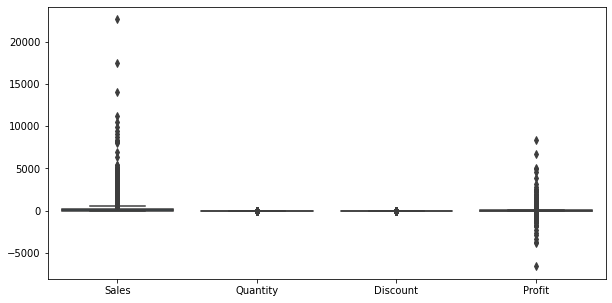

In [ ]:
plt.figure(figsize=[10,5])
sns.boxplot(data=num_df)
plt.show()

**removing outliners**

In [ ]:
df['z-score'] = (df.Sales-df.Sales.mean())/df.Sales.std()
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.051002
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.804512
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,-0.345553
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1.166272
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,-0.333131


In [ ]:
df.shape

(9977, 12)

In [ ]:
df_no_outliers = df[df['z-score']<3]
df_no_outliers.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.051002
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.804512
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,-0.345553
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1.166272
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,-0.333131


**checking if outliers are removed or not**

In [ ]:
new_df = df_no_outliers
new_df.shape

(9850, 12)

**Creating Visual methods to analyze data**

**Numerical-Categorical data**



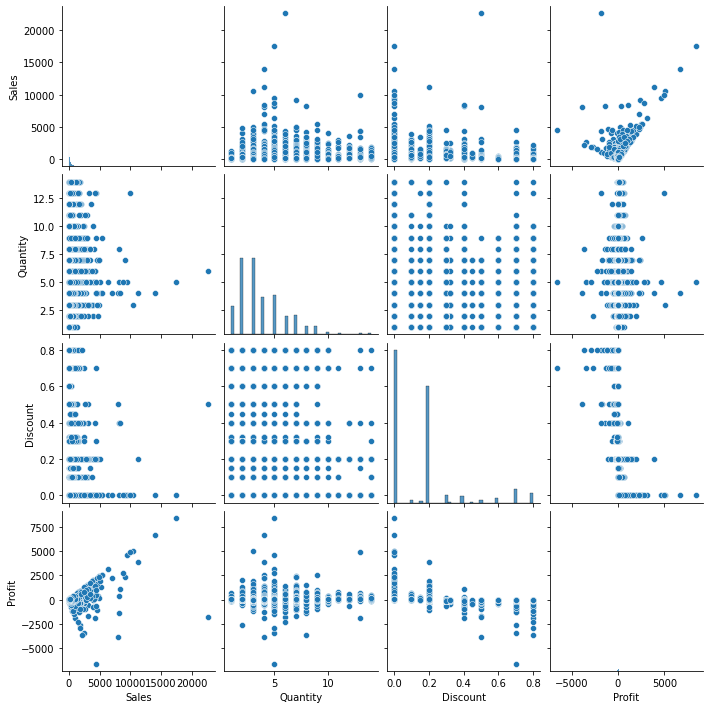

In [ ]:
#Pairplot
sns.pairplot(num_df)

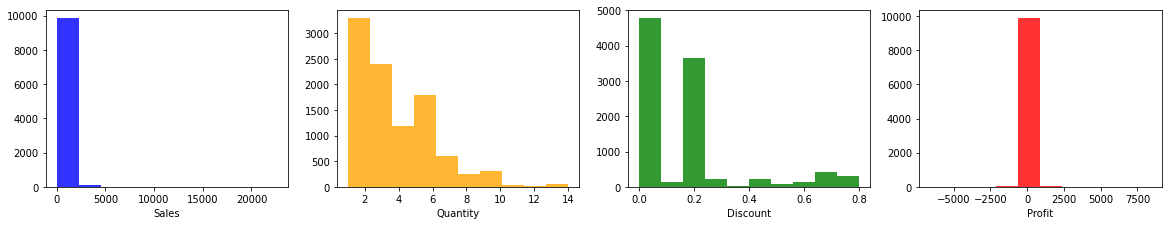

In [ ]:
#Histograms
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
plt.hist(df.Sales, color='blue', alpha = 0.8)
plt.xlabel('Sales')

plt.subplot(4,4,2)
plt.hist(df.Quantity, color='orange', alpha = 0.8)
plt.xlabel('Quantity')

plt.subplot(4,4,3)
plt.hist(df.Discount, color='green', alpha = 0.8)
plt.xlabel('Discount')

plt.subplot(4,4,4)
plt.hist(df.Profit, color='red', alpha = 0.8)
plt.xlabel('Profit')


plt.show()

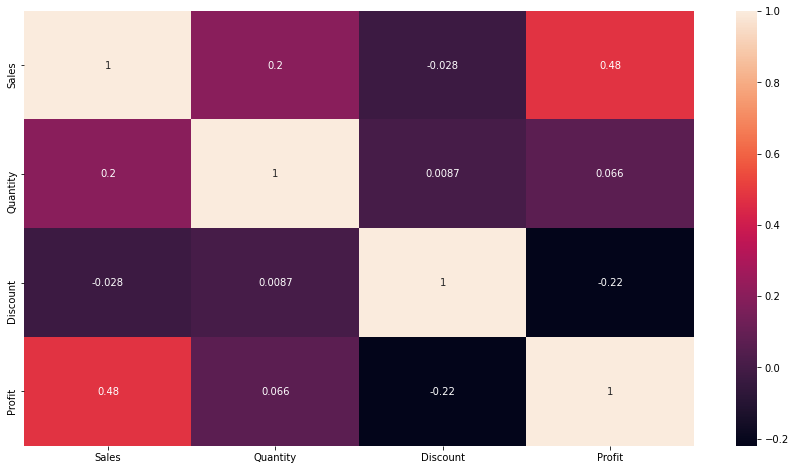

In [ ]:
#Heatmap

f,ax = plt.subplots(figsize=(15,8))
sns.heatmap(num_df.corr(),annot=True)

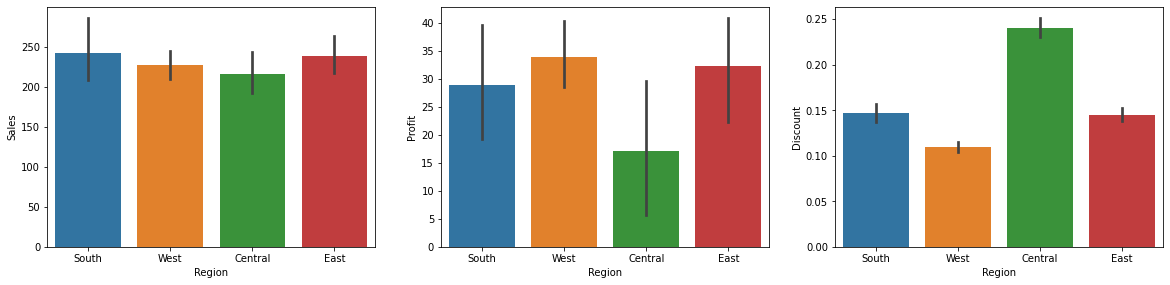

In [ ]:
#Barplot
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.barplot(x='Region',y='Sales',data=df)
plt.xlabel('Region')
plt.ylabel('Sales')

plt.subplot(3,3,2)
sns.barplot(x='Region',y='Profit',data=df)
plt.xlabel('Region')
plt.ylabel('Profit')


plt.subplot(3,3,3)
sns.barplot(x='Region',y='Discount',data=df)
plt.xlabel('Region')
plt.ylabel('Discount')


plt.show()



*   South-East Region has more Sales than West & Central.
*   West-East Region covered more profit , while Centrall region covered least profit.
*   Central Region has the highest discount amounts

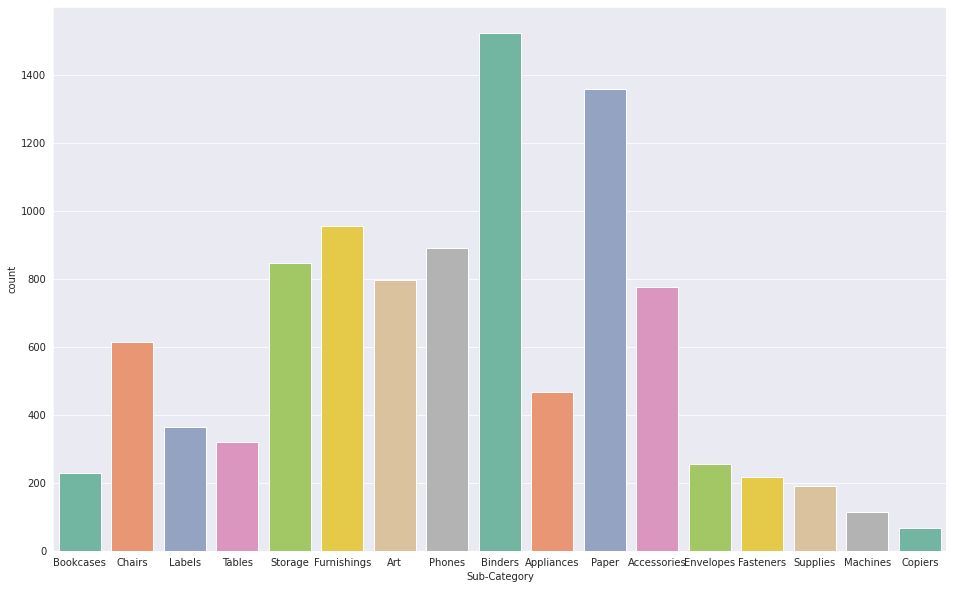

In [ ]:
#Countplot for Sub-Categories
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.countplot(x='Sub-Category',data=df,palette='Set2')

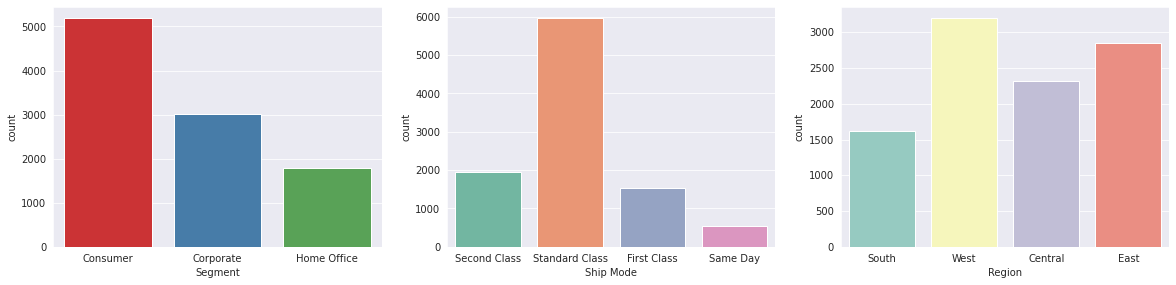

In [ ]:
#displaying the total counts:

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.set_style("darkgrid")
sns.countplot(x='Segment',data=df,palette="Set1")

plt.subplot(3,3,2)
sns.set_style("darkgrid")
sns.countplot(x='Ship Mode',data=df,palette="Set2")

plt.subplot(3,3,3)
sns.set_style("darkgrid")
sns.countplot(x="Region",data=df,palette="Set3")

plt.show()

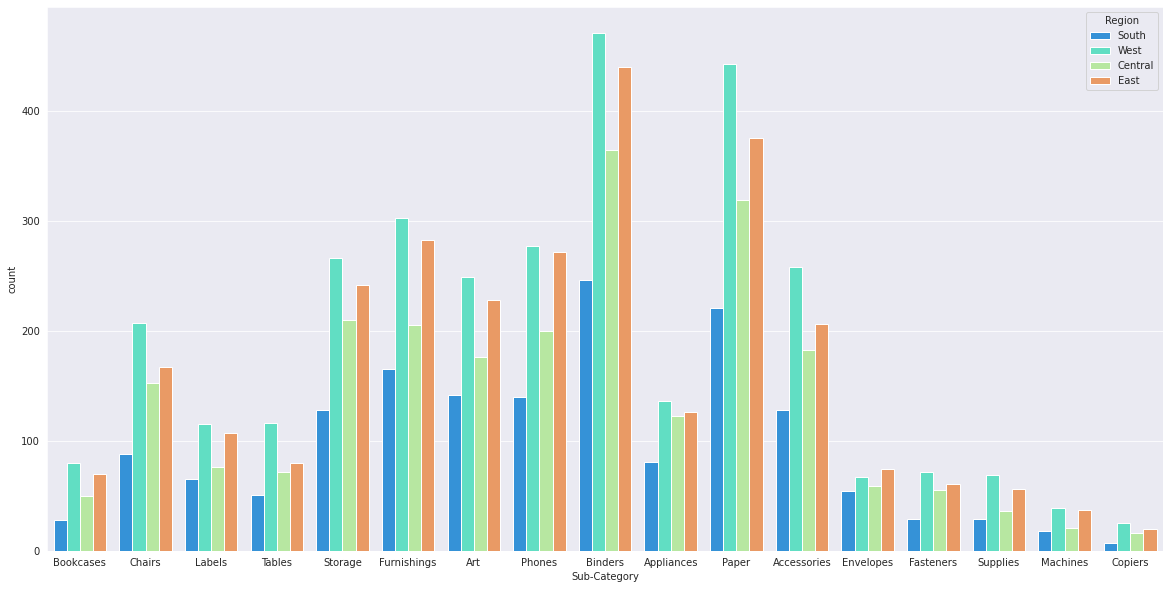

In [ ]:

plt.figure(figsize=(20,10))
sns.countplot(x="Sub-Category", hue="Region", data=df,palette="rainbow")
plt.show()

**Analyzing trends, patterns, and relationships in Data**

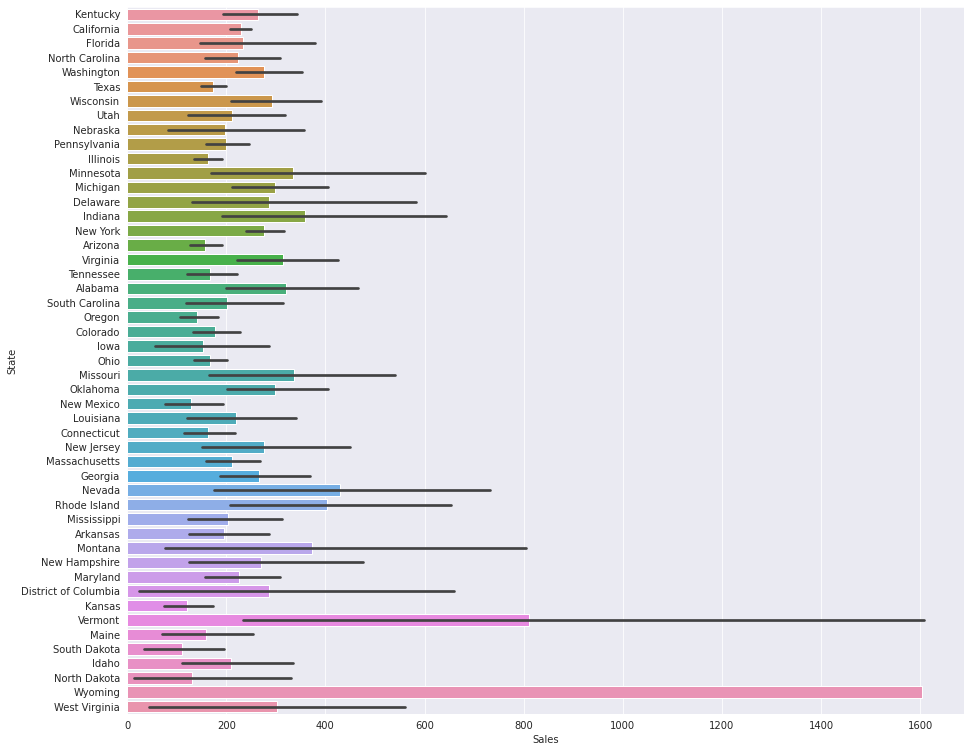

In [ ]:
#state vs sales
plt.figure(figsize=[15,13])
ax = sns.barplot(x='Sales', y='State', data=df)

In [ ]:

df_top_10_states_p = df.groupby("State")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
print(df_top_10_states_p.head(10))

         State      Profit
3   California  76330.7891
30    New York  74015.4622
45  Washington  33368.2375
20    Michigan  24428.0903
44    Virginia  18597.9504
12     Indiana  18382.9363
9      Georgia  16250.0433
15    Kentucky  11199.6966
21   Minnesota  10823.1874
6     Delaware   9977.3748




*   District of Columbia, Vermont, Wyoming states are generating highest profit.
*   States like Arizona, California, colorado, Connecticut, Delaaware, Florida, North Carolina, Texas, pennsylvayia, Illinois, Tennesse, Oregon are generating lowest profit.Hence focus has to be given in such States



In [ ]:

df_top_10_cities_p = df.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
print(df_top_10_cities_p.head(10))

df_top_10_cities_d = df.groupby("City")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
print("\n" , df_top_10_cities_d.head(10))

              City      Profit
329  New York City  62013.8973
266    Los Angeles  30431.4267
452        Seattle  29121.6825
438  San Francisco  17466.1186
123        Detroit  13146.6935
233      Lafayette  10018.3876
215        Jackson   7581.6828
21         Atlanta   6993.6629
300    Minneapolis   6824.5846
437      San Diego   6377.1960

               City  Discount
374   Philadelphia    175.30
207        Houston    142.74
80         Chicago    119.70
109         Dallas     56.30
266    Los Angeles     55.50
329  New York City     51.40
94        Columbus     38.20
216   Jacksonville     35.85
438  San Francisco     34.00
452        Seattle     27.80


**Overall Profit and Overall Discount on Region**

In [ ]:
overall_prof = df.groupby(['Region']).Profit.sum().sort_index(ascending=False).reset_index()
overall_disc = df.groupby(['Region']).Discount.sum().sort_index(ascending=False).reset_index()
merge = pd.merge(overall_prof,overall_disc,on="Region").rename(columns={'Discount':'Overall_Discount','Profit':'Overall_Profit'})
print(merge)

    Region  Overall_Profit  Overall_Discount
0     West     108329.8079            350.00
1    South      46749.4303            238.55
2     East      91506.3092            413.50
3  Central      39655.8752            557.14


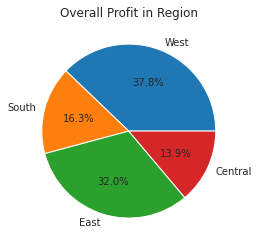

In [ ]:

fig,ax1 = plt.subplots()
ax1.pie(merge['Overall_Profit'], labels=['West','South','East','Central'],
        autopct='%1.1f%%')
ax1.set_title('Overall Profit in Region')
plt.show()

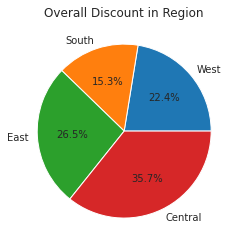

In [ ]:
fig,ax2 = plt.subplots()
ax2.pie(merge['Overall_Discount'], labels=['West','South','East','Central'],
        autopct='%1.1f%%')
ax2.set_title('Overall Discount in Region')
plt.show()



*   From the above two pie charts overall loss is highest in central region as huge amount of discount is there on products.

*   west region has a great profit as much as double as discount.



**Comparing differrent region with Sales,Profit,Discount,Quantity on different Category of Products.**

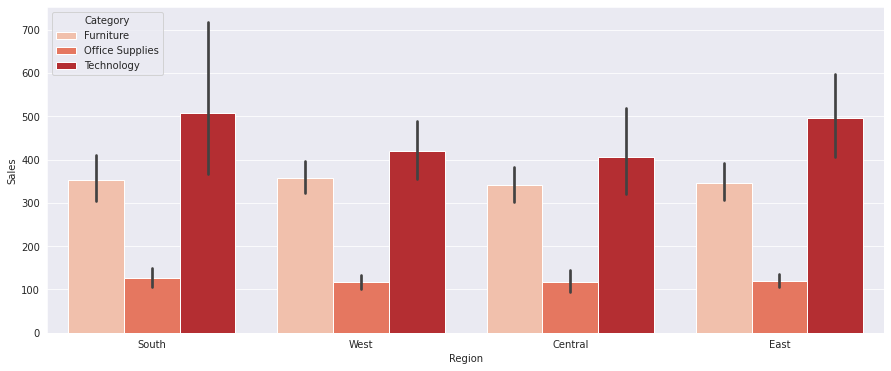

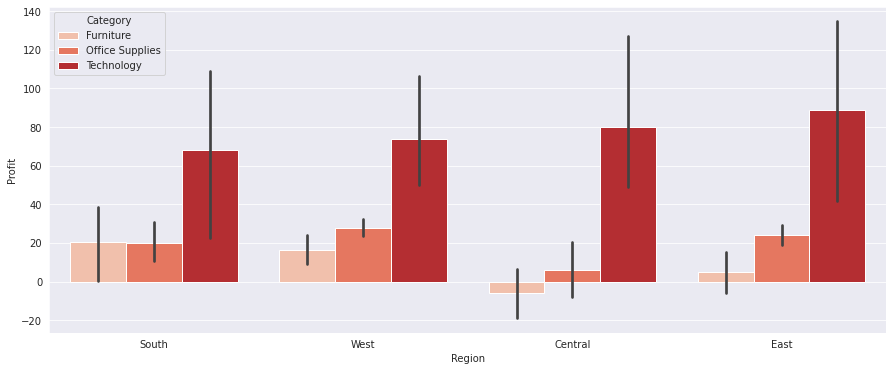

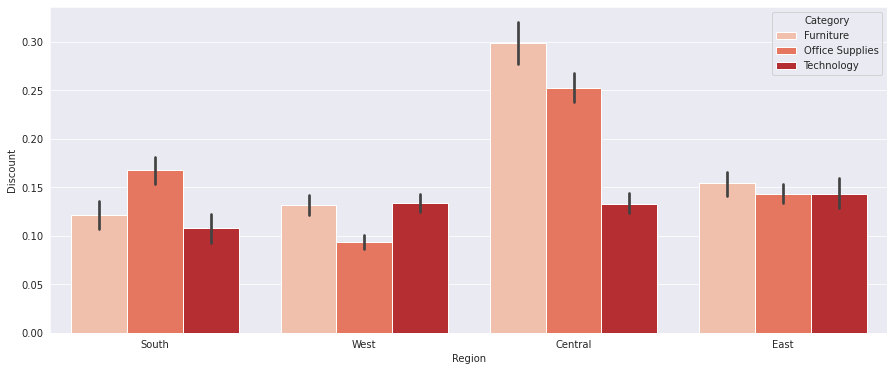

In [ ]:

# Region vs Sales/Proft/Discount/Quantity vs category
def region(y):
  plt.figure(figsize=[15,6])
  ax = sns.barplot(y=y, x='Region', data=df, hue="Category", palette="Reds")
    
region('Sales')
region('Profit')
region('Discount')

**Sub-category wise Profit and Discount**

In [ ]:
df_top_10_sub_cat_p = df.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
print(df_top_10_sub_cat_p.head(10))

df_top_10_sub_cat_d = df.groupby("Sub-Category")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
print("\n", df_top_10_sub_cat_d.head(10))

   Sub-Category      Profit
6       Copiers  55617.8249
13       Phones  44515.7306
0   Accessories  41936.6357
12        Paper  33944.2395
3       Binders  30228.0003
5        Chairs  26567.1278
14      Storage  21278.8264
1    Appliances  18138.0054
9   Furnishings  13052.7230
7     Envelopes   6964.1767

    Sub-Category  Discount
3       Binders    566.20
13       Phones    137.40
9   Furnishings    132.40
5        Chairs    104.70
12        Paper    101.80
16       Tables     83.35
1    Appliances     77.60
14      Storage     63.20
0   Accessories     60.80
2           Art     59.60


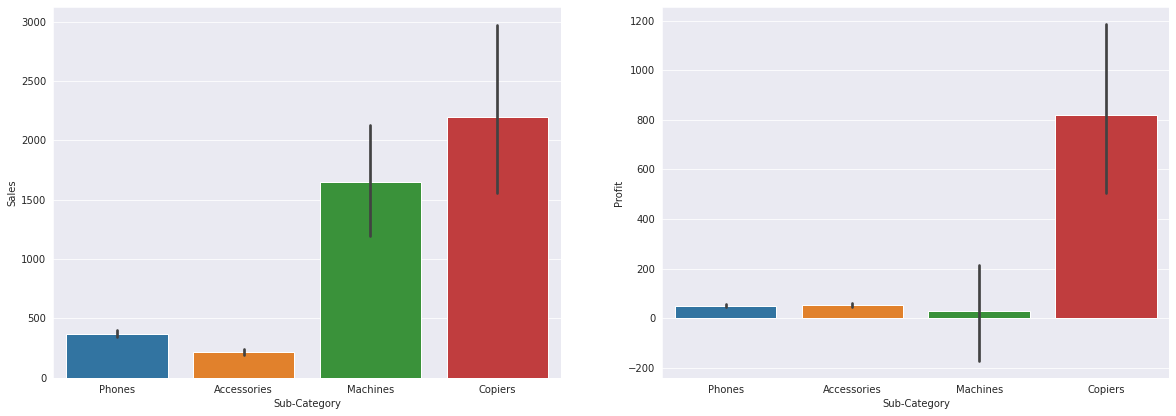

In [ ]:

df_tech=df[(df['Category']=="Technology")]
plt.figure(figsize=[20,15])
plt.subplot(2,2,1)
ax = sns.barplot(x="Sub-Category", y="Sales",data=df_tech)

plt.subplot(2,2,2)
ax = sns.barplot(x="Sub-Category", y="Profit", data=df_tech)

plt.show()

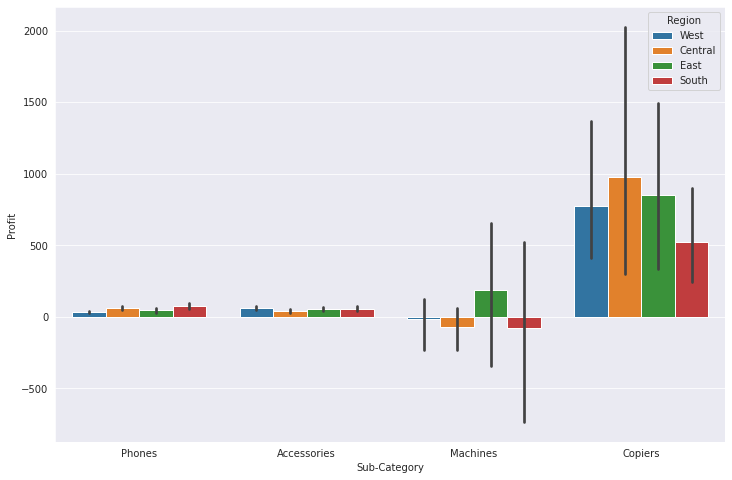

In [ ]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=df_tech)

**Segment vs Ship mode vs Profit**

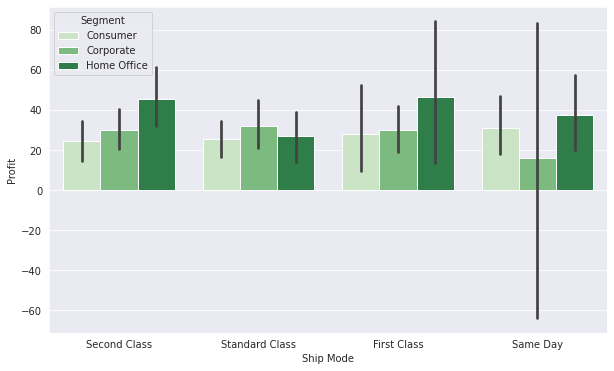

In [ ]:

# ship mode vs profit vs Segment
plt.figure(figsize=[10,6])
ax = sns.barplot(x='Ship Mode', y='Profit', hue="Segment", data=df, palette="Greens")



*   People generally preferred second class for home office
*   for corporate they preferred second class service
*   Consumer preferred same day service



**Conclusion**

*   Correlation Matrix shows positive relationship between Profit & Sales, Quantity & Sales.
*   Company offeres more Discount on Office Suppliers & furniture Category.
*   In case of Categories, Technology is always leading in terms of Sales and Profit.
*   Copiers has highest amount of sales and profit.

*   In the Central Rregion company(Store) giving lots of discount but the Output is very less in quantity.
*   Company Provides highest Quantity for Office Suppliers but Sales are not that much good enough,Quantity should be minimized and provide it to the Furniture category instead of Office Suppliers.








